In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
X = data["data"].copy()[ :, 2:4]# 2 columns to allow straightforward decision boundary visualization
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

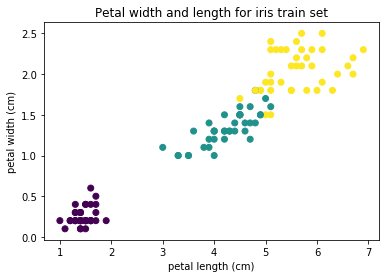

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel(data["feature_names"][2])
plt.ylabel(data["feature_names"][3])
plt.title("Petal width and length for iris train set")
plt.show()

In [4]:
from sklearn.naive_bayes import GaussianNB

gauss_nb_clf = GaussianNB(priors = None,# class priors, if defined priors won't be set from data
                         var_smoothing = 1e-9# added this time maximum feature variance onto variance for smoothing
                         )
gauss_nb_clf.fit(X_train, y_train)
print("Test score:",gauss_nb_clf.score(X_test,y_test))

Test score: 1.0


In [5]:
print("Class counts:",gauss_nb_clf.class_count_)
print("Class priors:",gauss_nb_clf.class_prior_)
print("Classes:",gauss_nb_clf.classes_)
print("Additional variance:",gauss_nb_clf.epsilon_)
print("Feature variance",np.var(X_train,axis=0).max())
print("Feature variance per class:",gauss_nb_clf.sigma_)
print("Feature means per class:",gauss_nb_clf.theta_)

Class counts: [40. 40. 40.]
Class priors: [0.33333333 0.33333333 0.33333333]
Classes: [0 1 2]
Additional variance: 3.1712493055555567e-09
Feature variance 3.1712493055555564
Feature variance per class: [[0.0305     0.01149375]
 [0.24544375 0.040275  ]
 [0.338275   0.0669    ]]
Feature means per class: [[1.45   0.2475]
 [4.2425 1.335 ]
 [5.585  2.04  ]]


In [6]:
def plotDecisionBoundary(svc, X, y, X_train, y_train, title, ax, savename):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    ax.scatter(X[:, 0],X[:, 1],c=y, cmap=plt.cm.cool)
    ax.set_xlabel(data["feature_names"][2])
    ax.set_ylabel(data["feature_names"][3])
    ax.set_title(title)
    plt.savefig(savename,bbox_inches='tight')
    

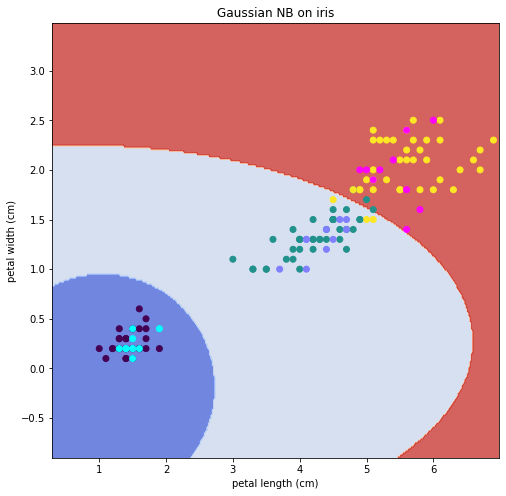

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotDecisionBoundary(gauss_nb_clf, X_test, y_test, X_train, 
                     y_train, title=f"Gaussian NB on iris", ax=ax, savename="gaussianNB.png")
plt.show()

Test score: 0.8333333333333334


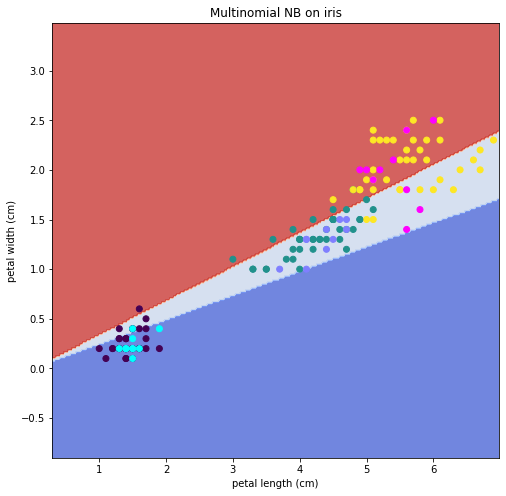

In [8]:
from sklearn.naive_bayes import MultinomialNB
# https://scikit-learn.org/stable/modules/naive_bayes.html
multi_nb_clf = MultinomialNB(alpha=1, # additive smoothing parameter
                             fit_prior = True, # learn class probabilities from data, otherwise assumes uniform
                             class_prior = None # can manually give class priors instead of learning from data
                            )
multi_nb_clf.fit(X_train, y_train)
print("Test score:",multi_nb_clf.score(X_test,y_test))
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plotDecisionBoundary(multi_nb_clf, X_test, y_test, X_train, 
                     y_train, title=f"Multinomial NB on iris", ax=ax, savename="multinomialNB.png")
plt.show()